# Linear Regression in statsmodels (practice)

- [x] Perform initial preprocessing of data
- [x] Perform preprocessing for statsmodels
- [x] Run the model in statsmodels and produce a results summary
- [x] Evaluate the model on the test set

Dataset Link:  https://www.kaggle.com/datasets/hellbuoy/car-price-prediction 

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error

## Initial Preprocessing

In [199]:
df = pd.read_csv('Data/CarPrice_Assignment.csv', index_col = 'car_ID')
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [201]:
## checking for null values
df.isna().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [202]:
## Make x and y variables
y = df['price'].copy()
X = df.drop(columns=['price']).copy()
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=42)
X_train.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
car_ID,,,,,,,,,,,,,,,,,,,,,
91,1,nissan gt-r,diesel,std,two,sedan,fwd,front,94.5,165.3,...,four,103,idi,2.99,3.47,21.9,55,4800,45,50
174,-1,toyota corolla,gas,std,four,sedan,fwd,front,102.4,175.6,...,four,122,mpfi,3.31,3.54,8.7,92,4200,29,34
94,1,nissan titan,gas,std,four,wagon,fwd,front,94.5,170.2,...,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37
6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,...,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25
168,2,toyota corona liftback,gas,std,two,hardtop,rwd,front,98.4,176.2,...,four,146,mpfi,3.62,3.50,9.3,116,4800,24,30


In [203]:
## make cat selector and using it to save list of column names
cat_select = make_column_selector(dtype_include='object')
cat_cols = cat_select(X_train)
cat_cols

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [204]:
## make num selector and using it to save list of column names
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)
num_cols

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [205]:
## make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False)
                        )
num_pipe = make_pipeline(SimpleImputer(strategy='mean')#,
                          #StandardScaler()
                          )
preprocessor = make_column_transformer((cat_pipe,cat_cols),
                                        (num_pipe, num_cols), remainder='passthrough')

I am not scaling the data because it will make the coefficients harder to interpret.

## Preprocessing for statsmodels

In [206]:
## fit the col transformer
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['CarName', 'fueltype', 'aspiration',
                                  'doornumber', 'carbody', 'drivewheel',
                                  'enginelocation', 'enginetype',
                                  'cylindernumber', 'fuelsystem']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                        

**Getting feature names**

In [207]:
ohe_step = preprocessor.named_transformers_['pipeline-1'].named_steps['onehotencoder']
cat_features = ohe_step.get_feature_names_out(cat_cols)
cat_features

array(['CarName_Nissan versa', 'CarName_alfa-romero Quadrifoglio',
       'CarName_alfa-romero giulia', 'CarName_alfa-romero stelvio',
       'CarName_audi 100 ls', 'CarName_audi 100ls', 'CarName_audi 4000',
       'CarName_audi 5000', 'CarName_audi fox', 'CarName_bmw 320i',
       'CarName_bmw x1', 'CarName_bmw x3', 'CarName_bmw z4',
       'CarName_buick opel isuzu deluxe',
       'CarName_buick regal sport coupe (turbo)', 'CarName_buick skyhawk',
       'CarName_buick skylark', 'CarName_chevrolet vega 2300',
       'CarName_dodge challenger se', 'CarName_dodge colt (sw)',
       'CarName_dodge coronet custom', 'CarName_dodge d200',
       'CarName_dodge dart custom', 'CarName_dodge rampage',
       'CarName_honda accord', 'CarName_honda accord cvcc',
       'CarName_honda accord lx', 'CarName_honda civic',
       'CarName_honda civic (auto)', 'CarName_honda civic 1500 gl',
       'CarName_honda civic cvcc', 'CarName_honda prelude',
       'CarName_isuzu D-Max ', 'CarName_isuzu MU-X'

In [208]:
final_features = []
final_features.extend(cat_features)
final_features.extend(num_cols)

**Transform X_train**

In [209]:
X_train_df = pd.DataFrame( preprocessor.transform(X_train), columns=final_features, index=X_train.index)
X_train_df.head()

,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi fox,CarName_bmw 320i,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
car_ID,,,,,,,,,,,,,,,,,,,,,
91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.5,2017.0,103.0,2.99,3.47,21.9,55.0,4800.0,45.0,50.0
174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.9,2326.0,122.0,3.31,3.54,8.7,92.0,4200.0,29.0,34.0
94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,53.5,2024.0,97.0,3.15,3.29,9.4,69.0,5200.0,31.0,37.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,53.1,2507.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0
168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.0,2540.0,146.0,3.62,3.50,9.3,116.0,4800.0,24.0,30.0


In [210]:
X_test_df = pd.DataFrame(preprocessor.transform(X_test), columns=final_features, index=X_test.index)
X_test_df.head()

,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi fox,CarName_bmw 320i,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
car_ID,,,,,,,,,,,,,,,,,,,,,
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,55.7,3230.0,209.0,3.62,3.39,8.00,182.0,5400.0,16.0,22.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.0,3053.0,131.0,3.13,3.40,7.00,160.0,5500.0,16.0,22.0
101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.7,2302.0,120.0,3.33,3.47,8.50,97.0,5200.0,27.0,34.0
133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,56.1,2658.0,121.0,3.54,3.07,9.31,110.0,5250.0,21.0,28.0
69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,58.7,3750.0,183.0,3.58,3.64,21.50,123.0,4350.0,22.0,25.0


**Adding a constant**

In [211]:
X_train_df = sm.add_constant(X_train_df, prepend=False)
X_test_df = sm.add_constant(X_test_df, prepend=False, has_constant='add')
display(X_train_df.head(2), X_test_df.head(2))

,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi fox,CarName_bmw 320i,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,const
car_ID,,,,,,,,,,,,,,,,,,,,,
91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2017.0,103.0,2.99,3.47,21.9,55.0,4800.0,45.0,50.0,1.0
174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2326.0,122.0,3.31,3.54,8.7,92.0,4200.0,29.0,34.0,1.0


,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi fox,CarName_bmw 320i,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,const
car_ID,,,,,,,,,,,,,,,,,,,,,
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3230.0,209.0,3.62,3.39,8.0,182.0,5400.0,16.0,22.0,1.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3053.0,131.0,3.13,3.40,7.0,160.0,5500.0,16.0,22.0,1.0


## Run the model in statsmodels and produce a results summary

In [212]:
model = sm.OLS(y_train, X_train_df)
result = model.fit()

In [213]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     14.70
Date:                Sat, 14 May 2022   Prob (F-statistic):            0.00126
Time:                        21:38:50   Log-Likelihood:                -1139.8
No. Observations:                 153   AIC:                             2574.
Df Residuals:                       6   BIC:                             3019.
Df Model:                         146                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
CarName_Nissan versa                     2780.2761   6247.193      0.445      0.672   -1.25e+04    1.81e+04
CarName_alfa-romero Quadrifoglio         4171.6131   7214.829      0.578      0.584   -1.35e+04    2.18e+04
CarName_alfa-romero giulia              -3648.5225   5867.049     -0.622      0.557    -1.8e+04    1.07e+04
CarName_alfa-romero stelvio              -643.5225   5867.049     -0.110      0.916    -1.5e+04    1.37e+04
CarName_audi 100 ls                      1471.6822   3945.640      0.373      0.722   -8182.951    1.11e+04
CarName_audi 100ls                      -3582.7541   3870.321     -0.926      0.390   -1.31e+04    5887.579
CarName_audi 4000                       -1638.0785   7095.196     -0.231      0.825    -1.9e+04    1.57e+04
CarName_audi 5000                       -2515.4776   4483.782     -0.561      0.595   -1.35e+04    8455.941
CarName_audi fox                         4121.4112   1.28e+04      0.323      0.758   -2.71e+04    3.53e+04
CarName_bmw 320i                         7346.1212   5778.146      1.271      0.251   -6792.492    2.15e+04
CarName_bmw x1                           1.918e+04   1.02e+04      1.876      0.110   -5838.900    4.42e+04
CarName_bmw x3                           1.678e+04   7202.949      2.330      0.059    -843.548    3.44e+04
CarName_bmw z4                           1.343e+04   8622.622      1.558      0.170   -7664.254    3.45e+04
CarName_buick opel isuzu deluxe         -3469.5950   7752.164     -0.448      0.670   -2.24e+04    1.55e+04
CarName_buick regal sport coupe (turbo)  8790.8218   1.09e+04      0.809      0.450   -1.78e+04    3.54e+04
CarName_buick skyhawk                    1043.3913   1.38e+04      0.076      0.942   -3.27e+04    3.48e+04
CarName_buick skylark                   -6176.6426   7246.869     -0.852      0.427   -2.39e+04    1.16e+04
CarName_chevrolet vega 2300             -1073.6451   5327.712     -0.202      0.847   -1.41e+04     1.2e+04
CarName_dodge challenger se              1003.2570   6270.995      0.160      0.878   -1.43e+04    1.63e+04
CarName_dodge colt (sw)                 -3900.1592   6791.047     -0.574      0.587   -2.05e+04    1.27e+04
CarName_dodge coronet custom            -3554.1192   8782.584     -0.405      0.700    -2.5e+04    1.79e+04
CarName_dodge d200                      -1178.2201   9141.552     -0.129      0.902   -2.35e+04    2.12e+04
CarName_dodge dart custom                -553.4716   4904.682     -0.113      0.914   -1.26e+04    1.14e+04
CarName_dodge rampage                     -78.5718   7059.838     -0.011      0.991   -1.74e+04    1.72e+04
CarName_honda accord                     2945.9623   1.42e+04      0.208      0.842   -3.17e+04    3.76e+04
CarName_honda accord cvcc                 316.4436   1.07e+

##  Evaluate the model on the test set

In [214]:
test_preds = result.predict(X_test_df)

In [215]:
test_r2 = r2_score(y_test, test_preds)
test_mse = mean_squared_error(y_test, test_preds)

In [216]:
print(f'The testing r-square value is {test_r2:.3f} and the testing mean squared error is {test_mse:.2f}.')

The testing r-square value is 0.484 and the testing mean squared error is 34919164.50.


# Diagnosing Regression Model
Assumptions of Linear Regression
- Independence of Features / little-to-no multicollinearity
- Assumption of Linearity / linearity to the target
- Assumption of Normality / Normally distributed Residuals
- Assumption of homoscedasticty - or equal variance across residuals.


## Checking for the Assumption of Linearity

In [217]:
## saving list of numeric features to slice for pairplot
num_selector = make_column_selector(dtype_include='number')
cols = num_selector(df.drop(columns='price'))
len(cols)

14

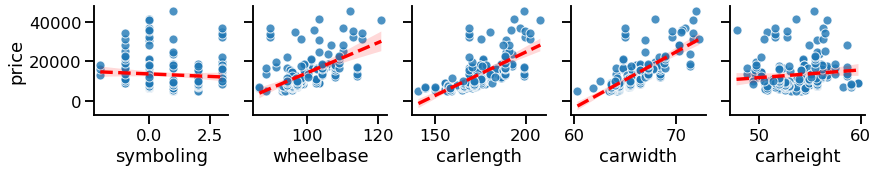

In [218]:
## Making a pairplot with regression lines (First five features)
sns.pairplot(df, y_vars='price',kind='reg',x_vars=cols[:5],
             plot_kws=dict(line_kws={'color':'red', 'ls':'--'},
                           scatter_kws={'edgecolor':'white','lw':1}));

In [219]:
b

NameError: name 'b' is not defined

In [ ]:
## Making a pairplot with regression lines (final 4 features)
sns.pairplot(df, y_vars='price',kind='reg',x_vars=cols[10:],
             plot_kws=dict(line_kws={'color':'red', 'ls':'--'},
                           scatter_kws={'edgecolor':'white','lw':1}));

The following features do not appear to have a linear relationship with the target:
- symboling
- carheight
- compressionratio
- peakrpm
- stroke\
These are the columns I will drop:

In [220]:
## dropping nonlinear features
df = df.drop(columns=['symboling','carheight', 'compressionratio', 'peakrpm', 'stroke'])

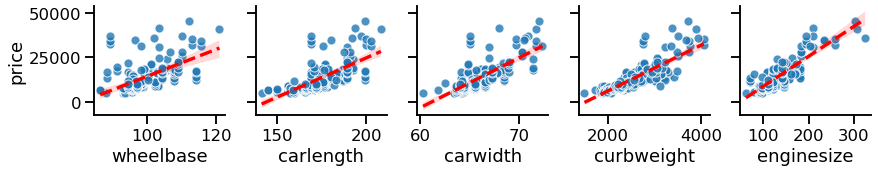

In [221]:
## saving list of numeric features to slice for pairplot
num_selector = make_column_selector(dtype_include='number')
cols = num_selector(df.drop(columns='price'))
len(cols)

## Making a pairplot with regression lines (First five features)
sns.pairplot(df, y_vars='price',kind='reg',x_vars=cols[:5],
             plot_kws=dict(line_kws={'color':'red', 'ls':'--'},
                           scatter_kws={'edgecolor':'white','lw':1}));

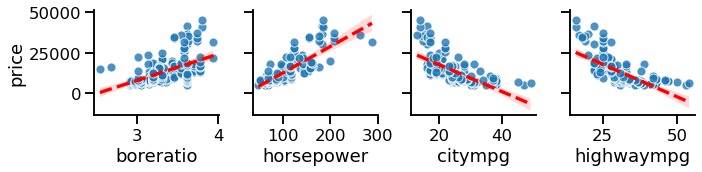

In [223]:

## Making a pairplot with regression lines (First five features)
sns.pairplot(df, y_vars='price',kind='reg',x_vars=cols[5:],
             plot_kws=dict(line_kws={'color':'red', 'ls':'--'},
                           scatter_kws={'edgecolor':'white','lw':1}));

## Checking for the Assumption of Little-to-No Multicollinearity

In [99]:
sns.set_context('talk')

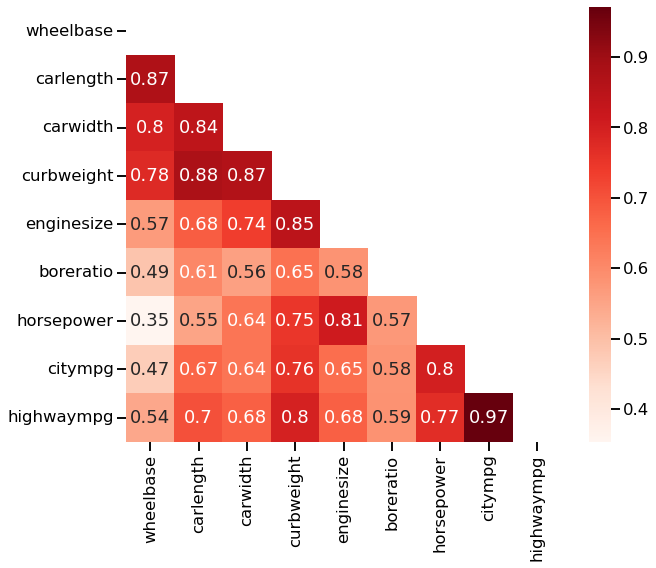

In [224]:
plt.subplots(figsize = (10,8))
corr = df.drop(columns='price').corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,square=True, cmap='Reds', annot=True, mask=mask);

In [105]:
corr > 0.8

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,stroke,horsepower,citympg,highwaympg
wheelbase,True,True,False,False,False,False,False,False,False,False
carlength,True,True,True,True,False,False,False,False,False,False
carwidth,False,True,True,True,False,False,False,False,False,False
curbweight,False,True,True,True,True,False,False,False,False,False
enginesize,False,False,False,True,True,False,False,True,False,False
boreratio,False,False,False,False,False,True,False,False,False,False
stroke,False,False,False,False,False,False,True,False,False,False
horsepower,False,False,False,False,True,False,False,True,True,False
citympg,False,False,False,False,False,False,False,True,True,True
highwaympg,False,False,False,False,False,False,False,False,True,True


In [225]:
def corr_adj_list(df, threshold = 0.8):
    """
    Returns an adjacency list representing a graph where each feature x is connected to other features
    that x is highly correlated to  
    """
    corr = df.corr().abs()
    # code adapted from https://www.geeksforgeeks.org/how-to-get-column-and-row-names-in-dataframe/
    listOfPos = list()
    # Get bool dataframe with True at positions where the given value exists
    result = corr > threshold
    # Get list of columns that contains the value
    seriesObj = result.any()
    columnNames = list(seriesObj[seriesObj == True].index)
    # Iterate over list of columns and fetch the rows indexes where value exists
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            listOfPos.append((row, col))
        # Return a list of tuples indicating the positions of value in the dataframe
    listOfPos = [(x,y) for x, y in listOfPos if x != y] #removing the correlations w/ self
    correlations = {}

    for x, y in listOfPos:
        if x in correlations.keys():
            correlations[x].append(y)
        else:
            correlations[x] = [y]
        if y in correlations.keys():
            correlations[y].append(x)
        else:
            correlations[y] = [x]

    for feature, corrs in correlations.items():
        correlations[feature] = list(set(corrs))
    return correlations

In [226]:
edges = corr_adj_list(df.drop(columns =['price']))
edges

{'carlength': ['curbweight', 'carwidth', 'wheelbase'],
 'wheelbase': ['carlength'],
 'carwidth': ['carlength', 'curbweight'],
 'curbweight': ['carlength', 'carwidth', 'enginesize'],
 'enginesize': ['curbweight', 'horsepower'],
 'horsepower': ['citympg', 'enginesize'],
 'citympg': ['horsepower', 'highwaympg'],
 'highwaympg': ['citympg']}

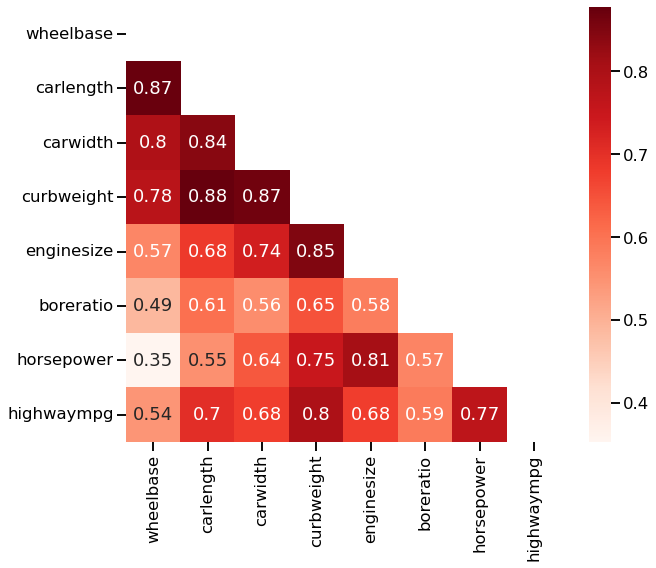

In [227]:
plt.subplots(figsize = (10,8))
corr = df.drop(columns=['price', 'citympg']).corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,square=True, cmap='Reds', annot=True, mask=mask);

In [141]:
!pip install networkx

     ---------------------------------------- 1.9/1.9 MB 5.1 MB/s eta 0:00:00


In [142]:
import networkx as nx

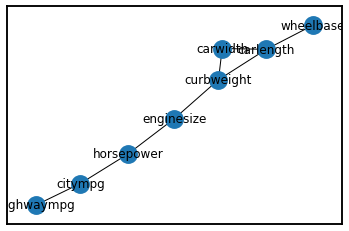

In [228]:
G = nx.from_dict_of_lists(edges)
nx.draw_networkx(G)
plt.show()

In [189]:
candidates = edges.keys()
candidates

dict_keys(['carlength', 'wheelbase', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'citympg', 'highwaympg'])

In [196]:
df.corr().abs()['price'][candidates].sort_values()

wheelbase     0.577816
carlength     0.682920
citympg       0.685751
highwaympg    0.697599
carwidth      0.759325
horsepower    0.808139
curbweight    0.835305
enginesize    0.874145
Name: price, dtype: float64

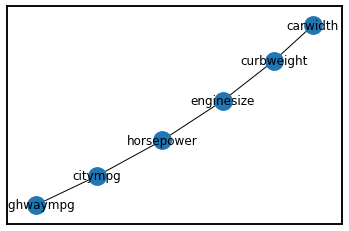

In [175]:
edges = list_of_correlations(df.drop(columns =['price', 'carlength']))
G = nx.from_dict_of_lists(edges)
nx.draw_networkx(G)
plt.show()

In [176]:
candidates = edges.keys()
df.corr().abs()['price'][candidates].sort_values()

citympg       0.685751
highwaympg    0.697599
carwidth      0.759325
horsepower    0.808139
curbweight    0.835305
enginesize    0.874145
Name: price, dtype: float64

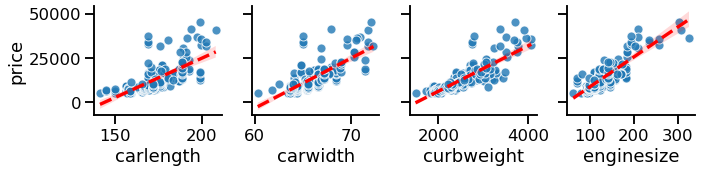

In [150]:
## Making a pairplot with regression lines (Next 5 features)
sns.pairplot(df, y_vars='price',kind='reg',x_vars=candidates[:4],
             plot_kws=dict(line_kws={'color':'red', 'ls':'--'},
                           scatter_kws={'edgecolor':'white','lw':1}));

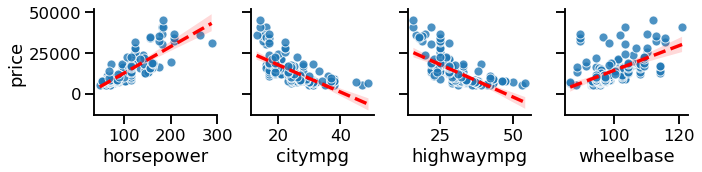

In [151]:
## Making a pairplot with regression lines (Next 5 features)
sns.pairplot(df, y_vars='price',kind='reg',x_vars=candidates[4:],
             plot_kws=dict(line_kws={'color':'red', 'ls':'--'},
                           scatter_kws={'edgecolor':'white','lw':1}));